# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">ESCREVER AQUI</span>


Objetivo principal -> Compreender como a variável de renda deve ser utilizada na concessão de crédito aos cliente e de que forma a relação desta variável dependente em conjunto com as explicativas podem contribuir para definir o perfil "default" do cliente

Área de atuação -> Na conclusão de que nossa empresa atua no ramo financeiro, é imprecindivel para ela contar com bons modelos de análise de crédito, já que este é o alicerce para balizar todas as operações, o modelo será utilizado por equipes de crédito, risco e análise financeira, e deve atuar para minimizar os riscos de inadimplência, aprimorar a experiência do usuário oferecendo uma concessão de crédito mais dinâmica e maximizar a base de clientes elegiveis. 

## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">ESCREVER AQUI</span>


### Dicionário de dados

<span style="color:red">ESCREVER AQUI</span>



| Variável                | Descrição                                                   | Tipo         |
| ----------------------- |:----------------------------------------------------------: | ------------:|
| data_ref                |  Data de registro das informações do cliente                |datetime64[ns]|
| id_cliente              |  Código de identificação para o registro de cada cliente    |int64         |
| sexo                    |  Sexo do cliente                                            |object        |
| posse_de_veiculo        |  Indicação da posse de veiculo do cliente                   | bool         |
| posse_de_imovel         |  Indicação da posse de imóvel do cliente                    | bool         |
| qtd_filhos              |  Quantidade de filhos que o cliente possui                  | int64        |
| tipo_renda              |  Tipo de renda do cliente                                   | object       |
| educacao                |  Nivel de educação acadêmica do cliente                     | object       |
| estado_civil            |  Status conjugal do cliente                                 | object       |
| tipo_residencia         |  Modelo de moradia do cliente                               | object       |
| idade                   |  Idade do cliente                                           | int64        |
| tempo_emprego           |  Tempo de trabalho continuo do cliente                      | object       |
| qt_pessoas_residencia   |  Quantidade de pessoas que dividem moradia com o cliente    | float64      |
| renda                   |  Número absoluto de ganho mensal do cliente                 | int64        |





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [100]:
# Bibliotecas padrão
import os

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Modelagem estatística
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Análise exploratória
from ydata_profiling import ProfileReport

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Configuração de plots inline para Jupyter Notebook
%matplotlib inline

<span style="color:red">ESCREVER AQUI</span>


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [101]:
previsao_renda = pd.read_csv('./input/previsao_de_renda.csv')


In [102]:
previsao_renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

<span style="color:red">ESCREVER AQUI</span>


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [103]:
os.makedirs('./output', exist_ok=True)

prof = ProfileReport(previsao_renda, explorative=True, minimal=True)
prof.to_file('./output/previsao_de_renda.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span style="color:red">ESCREVER AQUI</span>


In [104]:
lista_de_colunas = previsao_renda.columns.to_list()

In [105]:
resultados = [
    previsao_renda[coluna]
    .value_counts()
    .reset_index()
    .rename(columns={"index": coluna})
    for coluna in lista_de_colunas
]

resultado_final = pd.concat(
    [df.assign(variavel=coluna) for df, coluna in zip(resultados, lista_de_colunas)],
    ignore_index=True,
)


# resultado_filtrado = resultado_final.loc[resultado_final["variavel"] == "sexo"]
# resultado_filtrado.dropna(axis=1)

dicionario_de_distribuicao = {coluna: resultado_final.loc[resultado_final["variavel"] == coluna].dropna(axis=1) for coluna in lista_de_colunas}



In [106]:
(
    dicionario_de_distribuicao["sexo"]
    .drop("variavel", axis=1)
    .assign(percentual=lambda x: (x["count"] / x["count"].sum()) * 100)
    .set_index("count")
)

,sexo,percentual
count,,
10119,F,67.46
4881,M,32.54


In [107]:
(
    dicionario_de_distribuicao["posse_de_veiculo"]
    .drop("variavel", axis=1)
    .assign(percentual=lambda x: (x["count"] / x["count"].sum()) * 100)
    .set_index("count")
)

,posse_de_veiculo,percentual
count,,
9140,False,60.933333
5860,True,39.066667


In [108]:
(
    dicionario_de_distribuicao["posse_de_imovel"]
    .drop("variavel", axis=1)
    .assign(percentual=lambda x: (x["count"] / x["count"].sum()) * 100)
    .set_index("count")
)

,posse_de_imovel,percentual
count,,
10143,True,67.62
4857,False,32.38


In [109]:
(
    dicionario_de_distribuicao["qtd_filhos"]
    .drop("variavel", axis=1)
    .assign(percentual=lambda x: (x["count"] / x["count"].sum()) * 100)
    .set_index("count")
)

,qtd_filhos,percentual
count,,
10376,0.0,69.173333
3037,1.0,20.246667
1376,2.0,9.173333
185,3.0,1.233333
17,4.0,0.113333
5,7.0,0.033333
2,14.0,0.013333
2,5.0,0.013333


In [110]:
(
    dicionario_de_distribuicao["tipo_renda"]
    .drop("variavel", axis=1)
    .assign(percentual=lambda x: (x["count"] / x["count"].sum()) * 100)
    .set_index("count")
)

,tipo_renda,percentual
count,,
7633,Assalariado,50.886667
3508,Empresário,23.386667
2582,Pensionista,17.213333
1268,Servidor público,8.453333
9,Bolsista,0.060000


In [111]:
(
    dicionario_de_distribuicao["educacao"]
    .drop("variavel", axis=1)
    .assign(percentual=lambda x: (x["count"] / x["count"].sum()) * 100)
    .set_index("count")
)

,educacao,percentual
count,,
8895,Secundário,59.300000
5335,Superior completo,35.566667
579,Superior incompleto,3.860000
165,Primário,1.100000
26,Pós graduação,0.173333


In [112]:
(
    dicionario_de_distribuicao["estado_civil"]
    .drop("variavel", axis=1)
    .assign(percentual=lambda x: (x["count"] / x["count"].sum()) * 100)
    .set_index("count")
)

,estado_civil,percentual
count,,
10534,Casado,70.226667
1798,Solteiro,11.986667
1078,União,7.186667
879,Separado,5.860000
711,Viúvo,4.740000


In [113]:
(
    dicionario_de_distribuicao["tipo_residencia"]
    .drop("variavel", axis=1)
    .assign(percentual=lambda x: (x["count"] / x["count"].sum()) * 100)
    .set_index("count")
)

,tipo_residencia,percentual
count,,
13532,Casa,90.213333
675,Com os pais,4.500000
452,Governamental,3.013333
194,Aluguel,1.293333
83,Estúdio,0.553333
64,Comunitário,0.426667


In [114]:
(
    dicionario_de_distribuicao["idade"]
    .drop("variavel", axis=1)
    .assign(percentual=lambda x: (x["count"] / x["count"].sum()) * 100)
    .set_index("count")
    
)

,idade,percentual
count,,
538,40.0,3.586667
469,37.0,3.126667
458,43.0,3.053333
455,32.0,3.033333
441,33.0,2.940000
440,39.0,2.933333
438,38.0,2.920000
436,27.0,2.906667
435,60.0,2.900000


In [115]:
(
    dicionario_de_distribuicao["tempo_emprego"]
    .drop("variavel", axis=1)
    .assign(percentual=lambda x: (x["count"] / x["count"].sum()) * 100)
    .set_index("count")
)

,tempo_emprego,percentual
count,,
38,4.216438,0.305786
30,6.934247,0.241410
29,7.520548,0.233363
27,15.449315,0.217269
26,5.717808,0.209222
...,...,...
1,31.202740,0.008047
1,5.279452,0.008047
1,0.652055,0.008047


In [116]:
(
    dicionario_de_distribuicao["qt_pessoas_residencia"]
    .drop("variavel", axis=1)
    .assign(percentual=lambda x: (x["count"] / x["count"].sum()) * 100)
    .set_index("count")
)

,qt_pessoas_residencia,percentual
count,,
8181,2.0,54.540000
2752,1.0,18.346667
2551,3.0,17.006667
1311,4.0,8.740000
179,5.0,1.193333
18,6.0,0.120000
5,9.0,0.033333
2,15.0,0.013333
1,7.0,0.006667


In [117]:
(
    dicionario_de_distribuicao["renda"]
    .drop("variavel", axis=1)
    .assign(percentual=lambda x: (x["count"] / x["count"].sum()) * 100)
    .set_index("count")
    .sort_values(by='percentual', ascending=False)
)

,renda,percentual
count,,
6,5402.44,0.040000
6,9826.31,0.040000
6,43433.94,0.040000
6,728.96,0.040000
6,4234.94,0.040000
...,...,...
1,2481.61,0.006667
1,2838.25,0.006667
1,3416.02,0.006667


In [118]:
previsao_renda.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [119]:
lista_de_colunas = lista_de_colunas[3:]
lista_de_colunas

['sexo',
 'posse_de_veiculo',
 'posse_de_imovel',
 'qtd_filhos',
 'tipo_renda',
 'educacao',
 'estado_civil',
 'tipo_residencia',
 'idade',
 'tempo_emprego',
 'qt_pessoas_residencia',
 'renda']

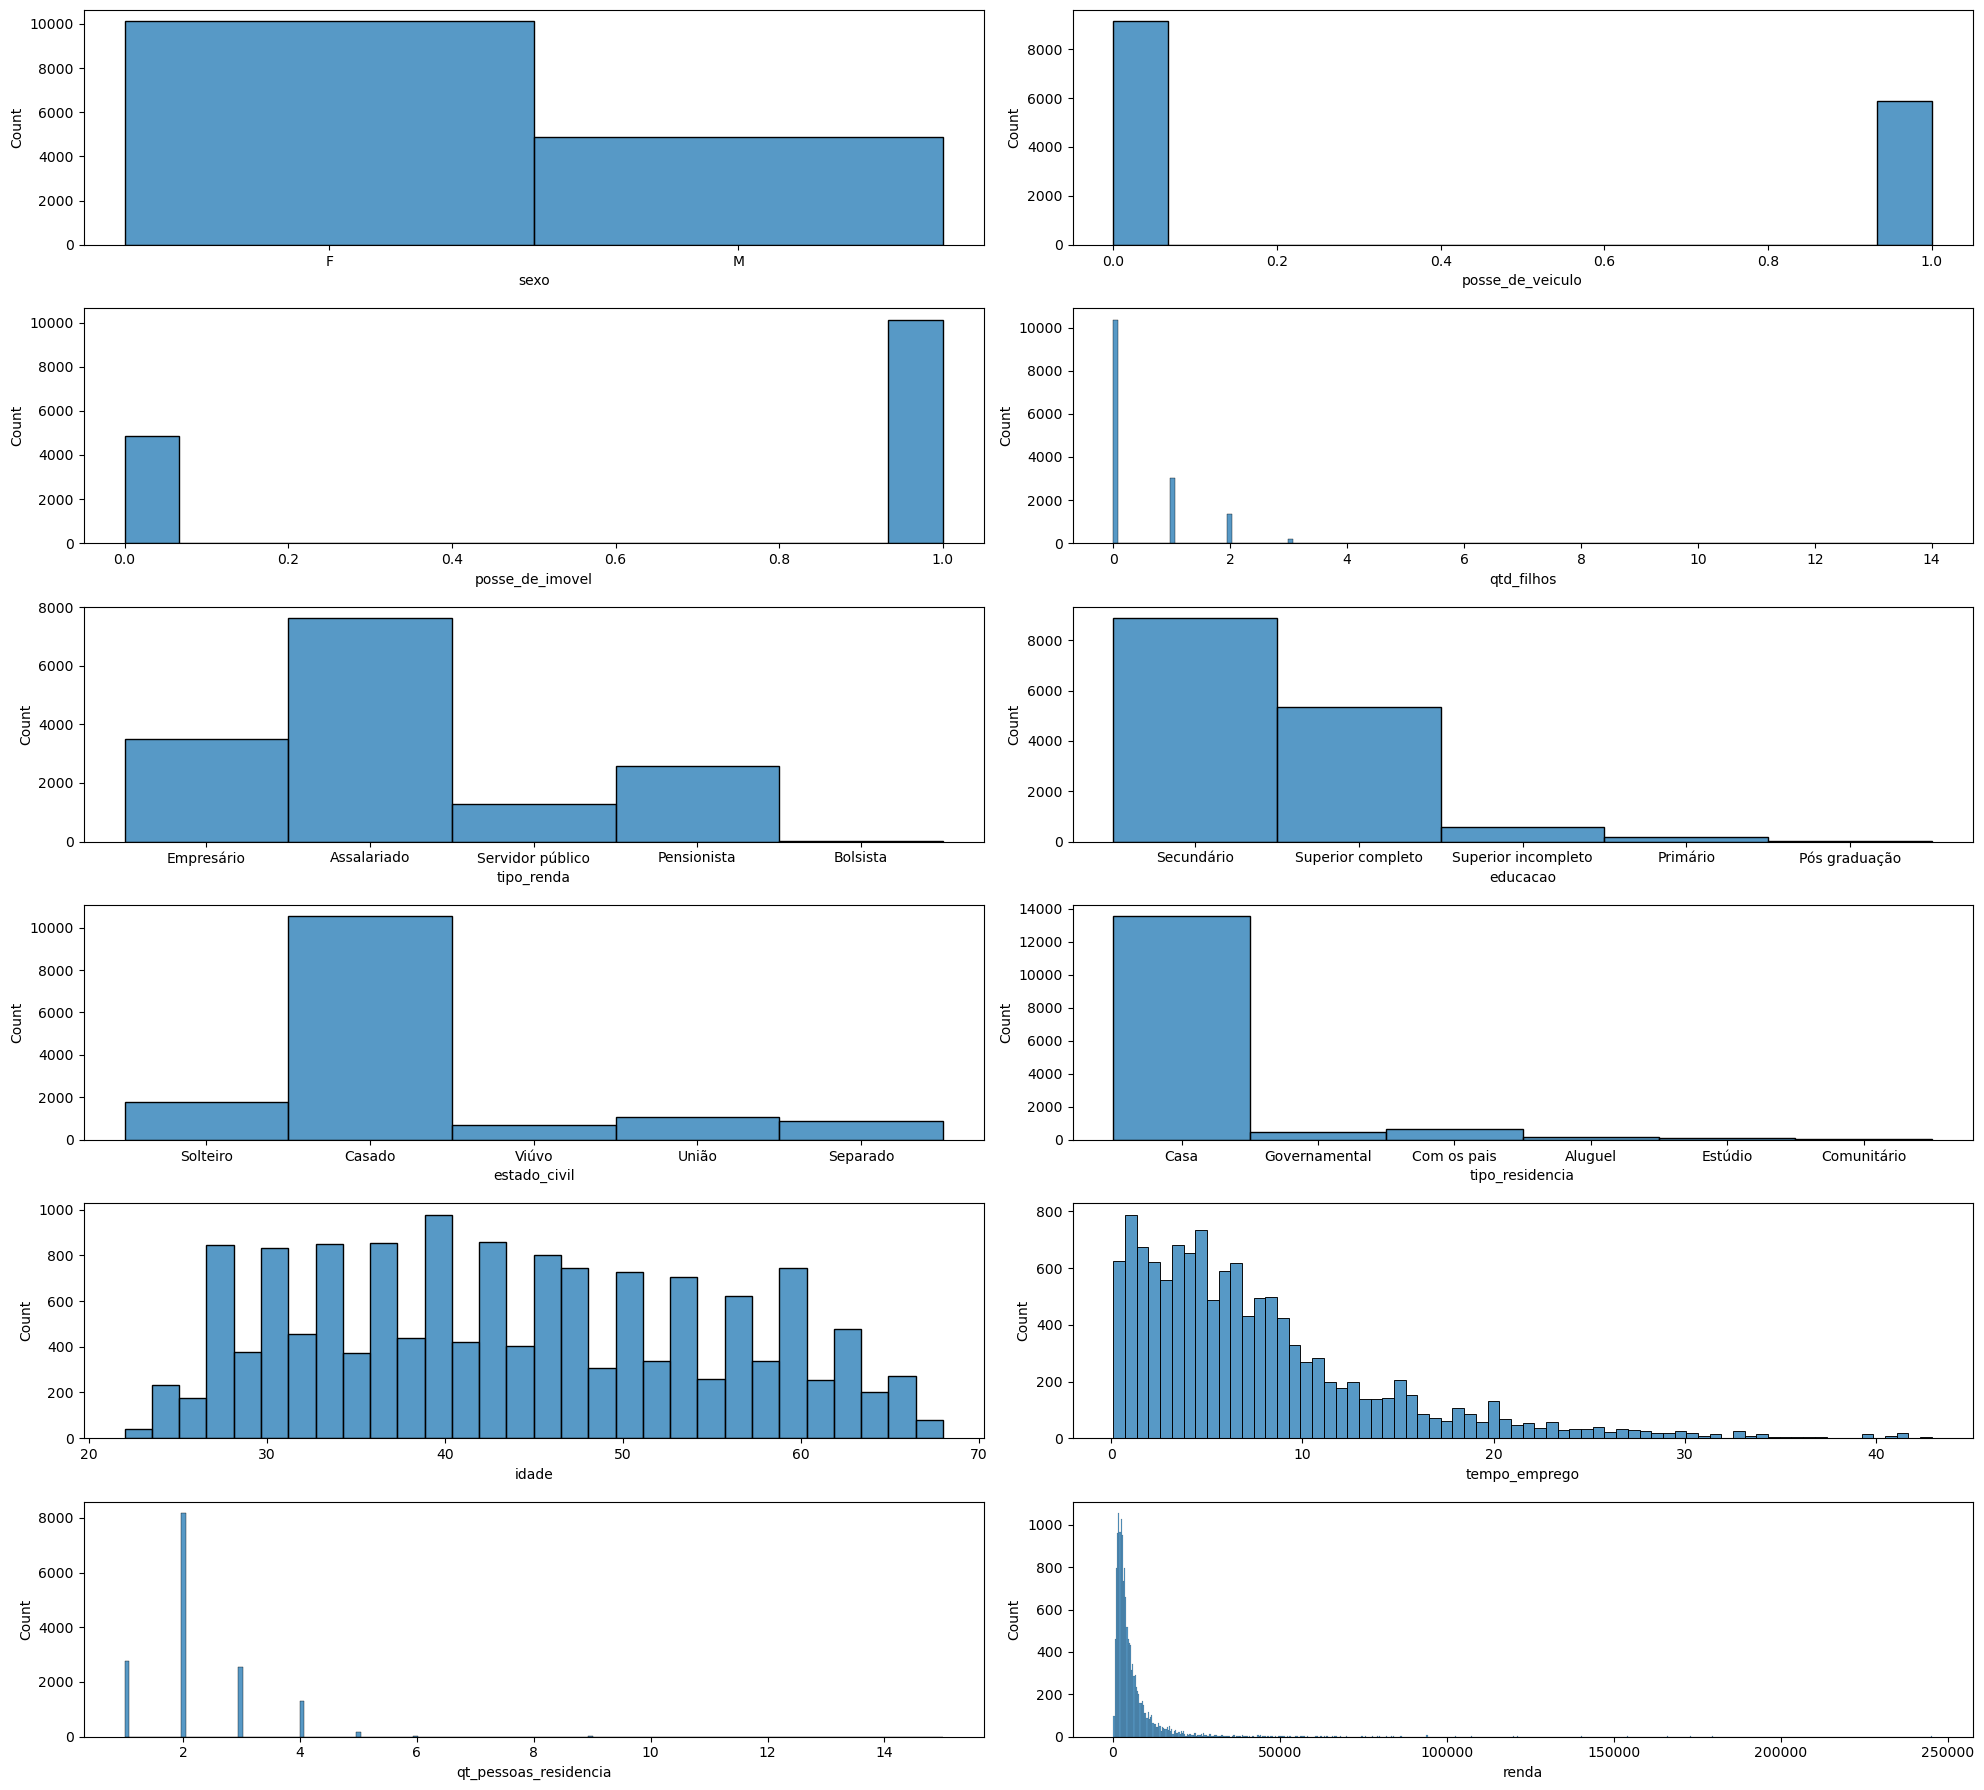

In [120]:
numero_variaveis = len(lista_de_colunas)

fig, axes = plt.subplots((numero_variaveis + 1 )// 2, ncols=2, figsize=(20, 18))
axes = axes.flatten()

for i, var in enumerate(lista_de_colunas):
    ax = axes[i]
    if (previsao_renda[var].dtypes == 'object') & (previsao_renda[var].dtypes == 'bool'):
        sns.countplot(data=previsao_renda, x=var, ax=ax)
    else:
        sns.histplot(data=previsao_renda, x=var, ax=ax)
        
plt.tight_layout()
plt.show()

In [121]:
previsao_renda['tipo_renda'].dtypes

dtype('O')

### Entendimento dos dados - Bivariadas




<span style="color:red">ESCREVER AQUI</span>


In [122]:
previsao_renda.data_ref = pd.to_datetime(previsao_renda.data_ref)

C:\Users\hfasa\AppData\Local\Temp\ipykernel_4848\3397581067.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')
C:\Users\hfasa\AppData\Local\Temp\ipykernel_4848\3397581067.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')
C:\Users\hfasa\AppData\Local\Temp\ipykernel_4848\3397581067.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')
C:\Users\hfasa\AppData\Local\Temp\ipykernel_4848\3397581067.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is ca

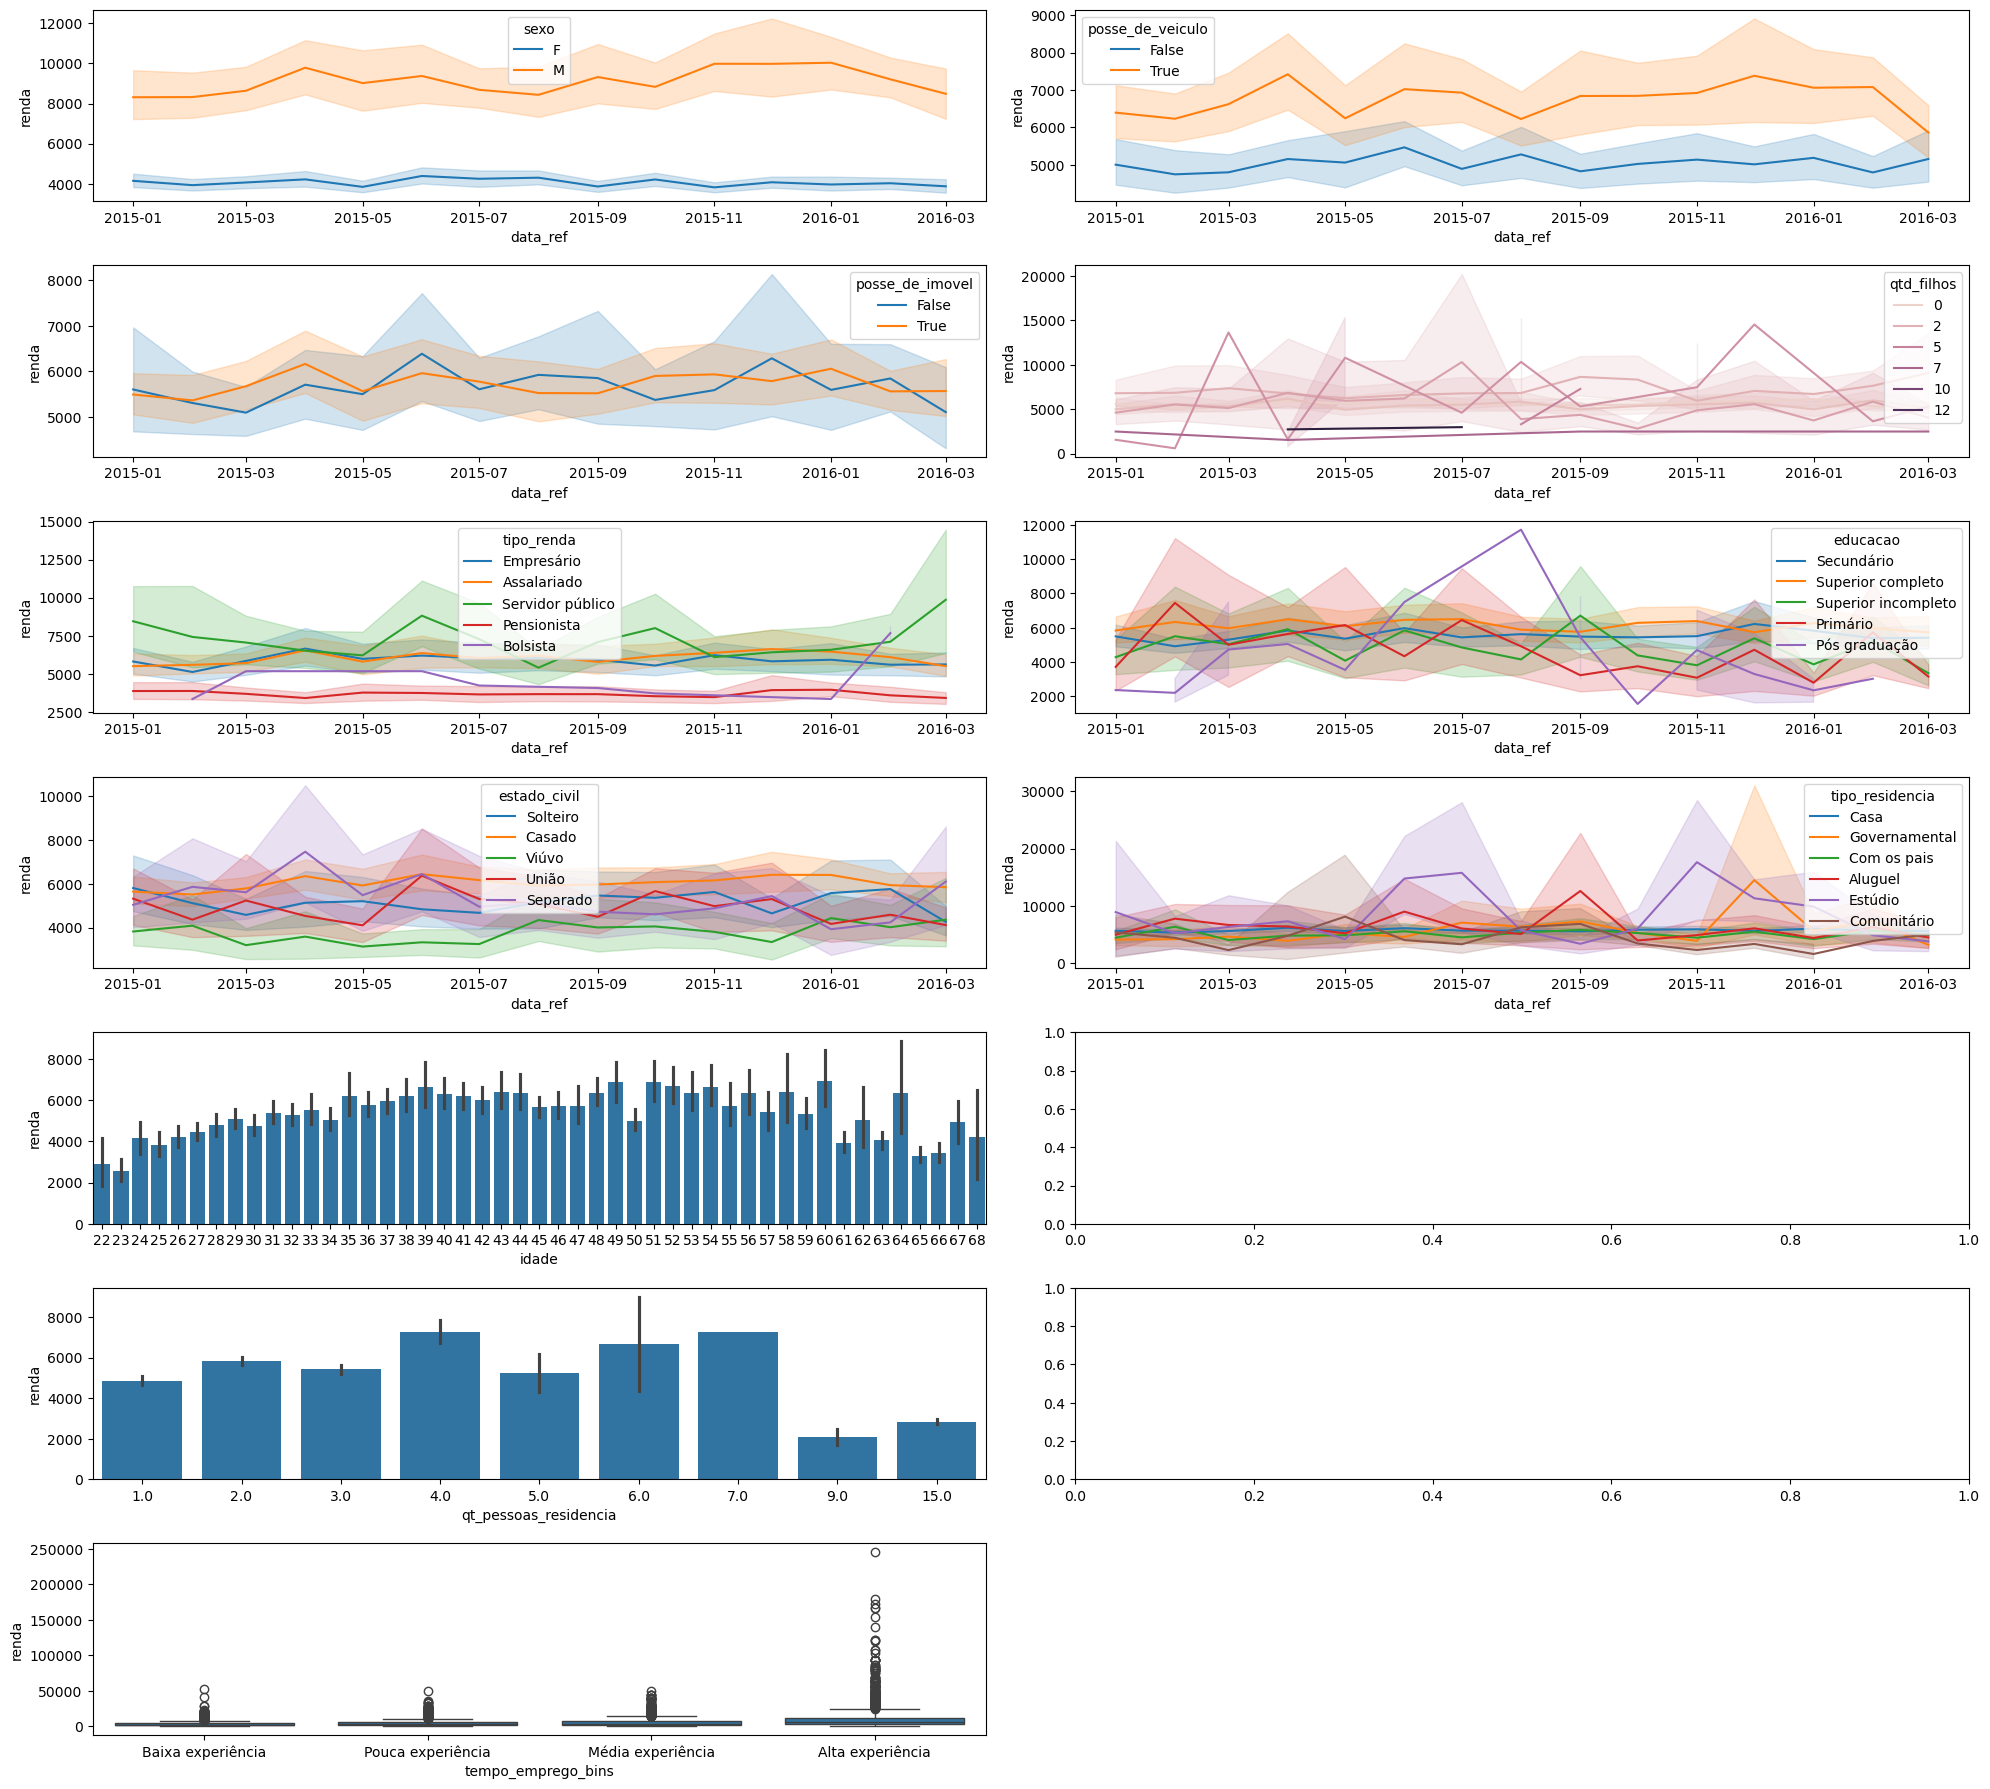

In [123]:
lista_de_colunas.append('tempo_emprego_bins')
numero_variaveis = len(lista_de_colunas)

fig, axes = plt.subplots((numero_variaveis + 1 )// 2, ncols=2, figsize=(20, 18))
axes = axes.flatten()

previsao_renda_secundaria = previsao_renda[previsao_renda['data_ref'].dt.is_month_start]
previsao_renda_secundaria['tempo_emprego_bins'] = pd.qcut(previsao_renda_secundaria['tempo_emprego'], q=4, labels=['Baixa experiência', 'Pouca experiência', 'Média experiência', 'Alta experiência' ])



for i, var in enumerate(lista_de_colunas):
    ax = axes[i]
    if var not in ['renda', 'tempo_emprego', 'idade', 'qt_pessoas_residencia', 'tempo_emprego_bins']:
        sns.lineplot(data=previsao_renda_secundaria, x='data_ref', y='renda', hue=var, ax=ax)
        plt.legend(loc='best')
    elif var in ['idade', 'qt_pessoas_residencia']:
        sns.barplot(data=previsao_renda, x=var, y='renda', ax=ax)
        plt.legend(loc='best')
    elif var == 'tempo_emprego_bins':
        sns.boxplot(data=previsao_renda_secundaria, x=var, y='renda', ax=ax)
        plt.legend(loc='best')
        
for j in range(numero_variaveis, len(axes)):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


In [124]:
previsao_renda.drop(columns=['Unnamed: 0', 'id_cliente'], inplace=
                    True)
previsao_renda.columns

Index(['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'renda'],
      dtype='object')

In [125]:
previsao_renda.isna().value_counts()

data_ref  sexo   posse_de_veiculo  posse_de_imovel  qtd_filhos  tipo_renda  educacao  estado_civil  tipo_residencia  idade  tempo_emprego  qt_pessoas_residencia  renda
False     False  False             False            False       False       False     False         False            False  False          False                  False    12427
                                                                                                                            True           False                  False     2573
Name: count, dtype: int64

In [126]:
previsao_renda.shape

(15000, 13)

In [127]:
previsao_renda = previsao_renda.dropna(axis=0)
previsao_renda.shape

(12427, 13)

In [128]:
(
    previsao_renda.assign(
        numero_de_dependentes=previsao_renda.qtd_filhos
        + previsao_renda.qt_pessoas_residencia
        - 1
    )
    .assign(
        idade_por_tempo_de_emprego=previsao_renda.idade / previsao_renda.tempo_emprego
    )
    .assign(
        posse_bens=previsao_renda.posse_de_veiculo.astype(str)
        + "_"
        + previsao_renda.posse_de_imovel.astype(str)
    )
)

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,numero_de_dependentes,idade_por_tempo_de_emprego,posse_bens
0,2015-01-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34,0.0,3.937759,False_True
1,2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15,1.0,3.897788,True_True
2,2015-01-01,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89,1.0,41.748366,True_True
3,2015-01-01,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77,3.0,6.189938,False_True
4,2015-01-01,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97,0.0,7.686662,True_False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,2016-03-01,M,True,False,0,Empresário,Superior incompleto,Casado,Casa,32,9.849315,2.0,1592.57,1.0,3.248957,True_False
14995,2016-03-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58,0.0,3.456303,False_True
14997,2016-03-01,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82,1.0,5.745016,True_True
14998,2016-03-01,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27,1.0,8.374761,True_False


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Experimentação de modelos

#### Modelo de regressão

In [129]:
x = previsao_renda.drop(columns=['renda', 'data_ref'])
y = previsao_renda.renda

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=100)

In [130]:
X_train = pd.get_dummies(x_train)
X_test = pd.get_dummies(x_test)


X_train.columns = X_train.columns.str.replace(' ', '_', regex=True)
X_test.columns = X_test.columns.str.replace(' ', '_', regex=True)

y = y_train

X_train = X_train.astype(float)
X_test = X_test.astype(float)

y = y.astype(float)

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

variaveis = stepwise_selection(X_train, y)

print('resulting features:')
print(variaveis)

Add  tempo_emprego                  with p-value 0.0
#############
['tempo_emprego']
Add  sexo_F                         with p-value 2.85907e-248
#############
['tempo_emprego', 'sexo_F']
Add  sexo_M                         with p-value 1.08998e-301
#############
['tempo_emprego', 'sexo_F', 'sexo_M']
Add  idade                          with p-value 6.86247e-06
#############
['tempo_emprego', 'sexo_F', 'sexo_M', 'idade']
Add  tipo_renda_Empresário          with p-value 3.02238e-05
#############
['tempo_emprego', 'sexo_F', 'sexo_M', 'idade', 'tipo_renda_Empresário']
Add  educacao_Superior_completo     with p-value 0.00798815
#############
['tempo_emprego', 'sexo_F', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior_completo']
Add  estado_civil_Casado            with p-value 0.0441891
#############
['tempo_emprego', 'sexo_F', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior_completo', 'estado_civil_Casado']
#############
['tempo_emprego', 'sexo_F', 'sexo_M', 'i

In [131]:
string_variaveis = 'tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário + educacao_Superior_completo + estado_civil_Casado'

In [132]:
md_treino = smf.ols(f"renda ~ {string_variaveis}", data=X_train.join(y_train))
reg = md_treino.fit_regularized(method='elastic_net', refit=True, L1_wt=1, alpha=0.001) 

In [133]:
reg.summary()

c:\Users\hfasa\anaconda3\envs\EBAC\Lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     379.5
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:00:48   Log-Likelihood:                -96967.
No. Observations:                9320   AIC:                         1.940e+05
Df Residuals:                    9312   BIC:                         1.940e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     72.9487    272.349      0.268      0.789    -460.914     606.811
tempo_emprego                564.7366     13.106     43.090      0.000     539.046     590.427
sexo_F                     -3027.3357    165.817    -18.257      0.000   -3352.374   -2702.298
sexo_M                      3100.2844    158.545     19.555      0.000    2789.502    3411.067
idade                         44.7429      9.378      4.771      0.000      26.359      63.127
tipo_renda_Empresário        754.7940    185.743      4.064      0.000     390.696    1118.892
educacao_Superior_completo   454.1448    172.022      2.640      0.008     116.944     791.346
estado_civil_Casado          371.5718    184.636      2.012      0.044       9.645     733.499
==============================================================================
Omnibus:                    13655.064   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8561544.032
Skew:                           8.680   Prob(JB):                         0.00
Kurtosis:                     150.464   Cond. No.                          nan
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is -2.1e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [134]:
string_variaveis = 'tempo_emprego + sexo_F + sexo_M + idade + tipo_renda_Empresário + educacao_Superior_completo + estado_civil_Casado'
string_variaveis_power = 'np.power(tempo_emprego,2) + sexo_F + sexo_M + np.power(idade,2) + tipo_renda_Empresário + educacao_Superior_completo + estado_civil_Casado'
string_variaveis_log = 'np.log(tempo_emprego) + sexo_F + sexo_M + np.log(idade) + tipo_renda_Empresário + educacao_Superior_completo + estado_civil_Casado'


lista_de_strings = [string_variaveis, string_variaveis_power, string_variaveis_log]
lista_de_strings_para_nomear = ['string_variaveis', 'string_variaveis_power', 'string_variaveis_log']
registro_de_residuos = {}
dicionario_indicadores = {}
valores_preditos = {}
colunas_ridge = ['Ridge comum', 'Ridge Power', 'Ridge Logaritmo']

In [135]:
for i , string in enumerate(lista_de_strings):
    md_treino = smf.ols(f"renda ~ {string}", data=X_train.join(y_train))
    reg = md_treino.fit_regularized(method='elastic_net', refit=True, L1_wt=0, alpha=0.001) 

    y_pred_test = reg.predict(X_test)
    valores_preditos[lista_de_strings_para_nomear[i]] = y_pred_test
    
    residuos_test = y_test - y_pred_test

    registro_de_residuos[lista_de_strings_para_nomear[i]] = residuos_test

    r_quadrado = r2_score(y_test, y_pred_test)
    r_quadrado_ajustado = 1 - ((1 - r_quadrado) * (len(y_test) - 1)) / (len(y_test) - len(X_test.columns) - 1)
    
    rss = np.power(y_test - y_pred_test, 2).sum()
    log_vero_test = (
    -len(y_train) / 2 * (np.log(2 * np.pi) + np.log(rss/len(y_test)) + 1)
    )
    
    
    aic = 2* len(reg.params) - 2 * log_vero_test
    
    dicionario_indicadores[colunas_ridge[i]] = {'R-Quadrado': round(r_quadrado, 3), 'R-Quadrado Ajustado': round(r_quadrado_ajustado, 3), 'AIC': aic, 'Coef': reg.params}

In [136]:
pd.DataFrame(dicionario_indicadores)

,Ridge comum,Ridge Power,Ridge Logaritmo
R-Quadrado,0.292,0.285,0.222
R-Quadrado Ajustado,0.285,0.278,0.215
AIC,190549.087614,190640.860018,191426.203292
Coef,"[75.27051112668725, 564.596557878297, -3019.24...","[2119.638342444813, 19.273516004164637, -1951....","[-7012.740057636155, 2837.4425095998995, -6422..."


In [137]:
md_res_log = registro_de_residuos['string_variaveis_log']
md_res_power = registro_de_residuos['string_variaveis_power']
md_res = registro_de_residuos['string_variaveis']

y_preditos_log = valores_preditos['string_variaveis_log']
y_preditos_power = valores_preditos['string_variaveis_power']
y_preditos = valores_preditos['string_variaveis']

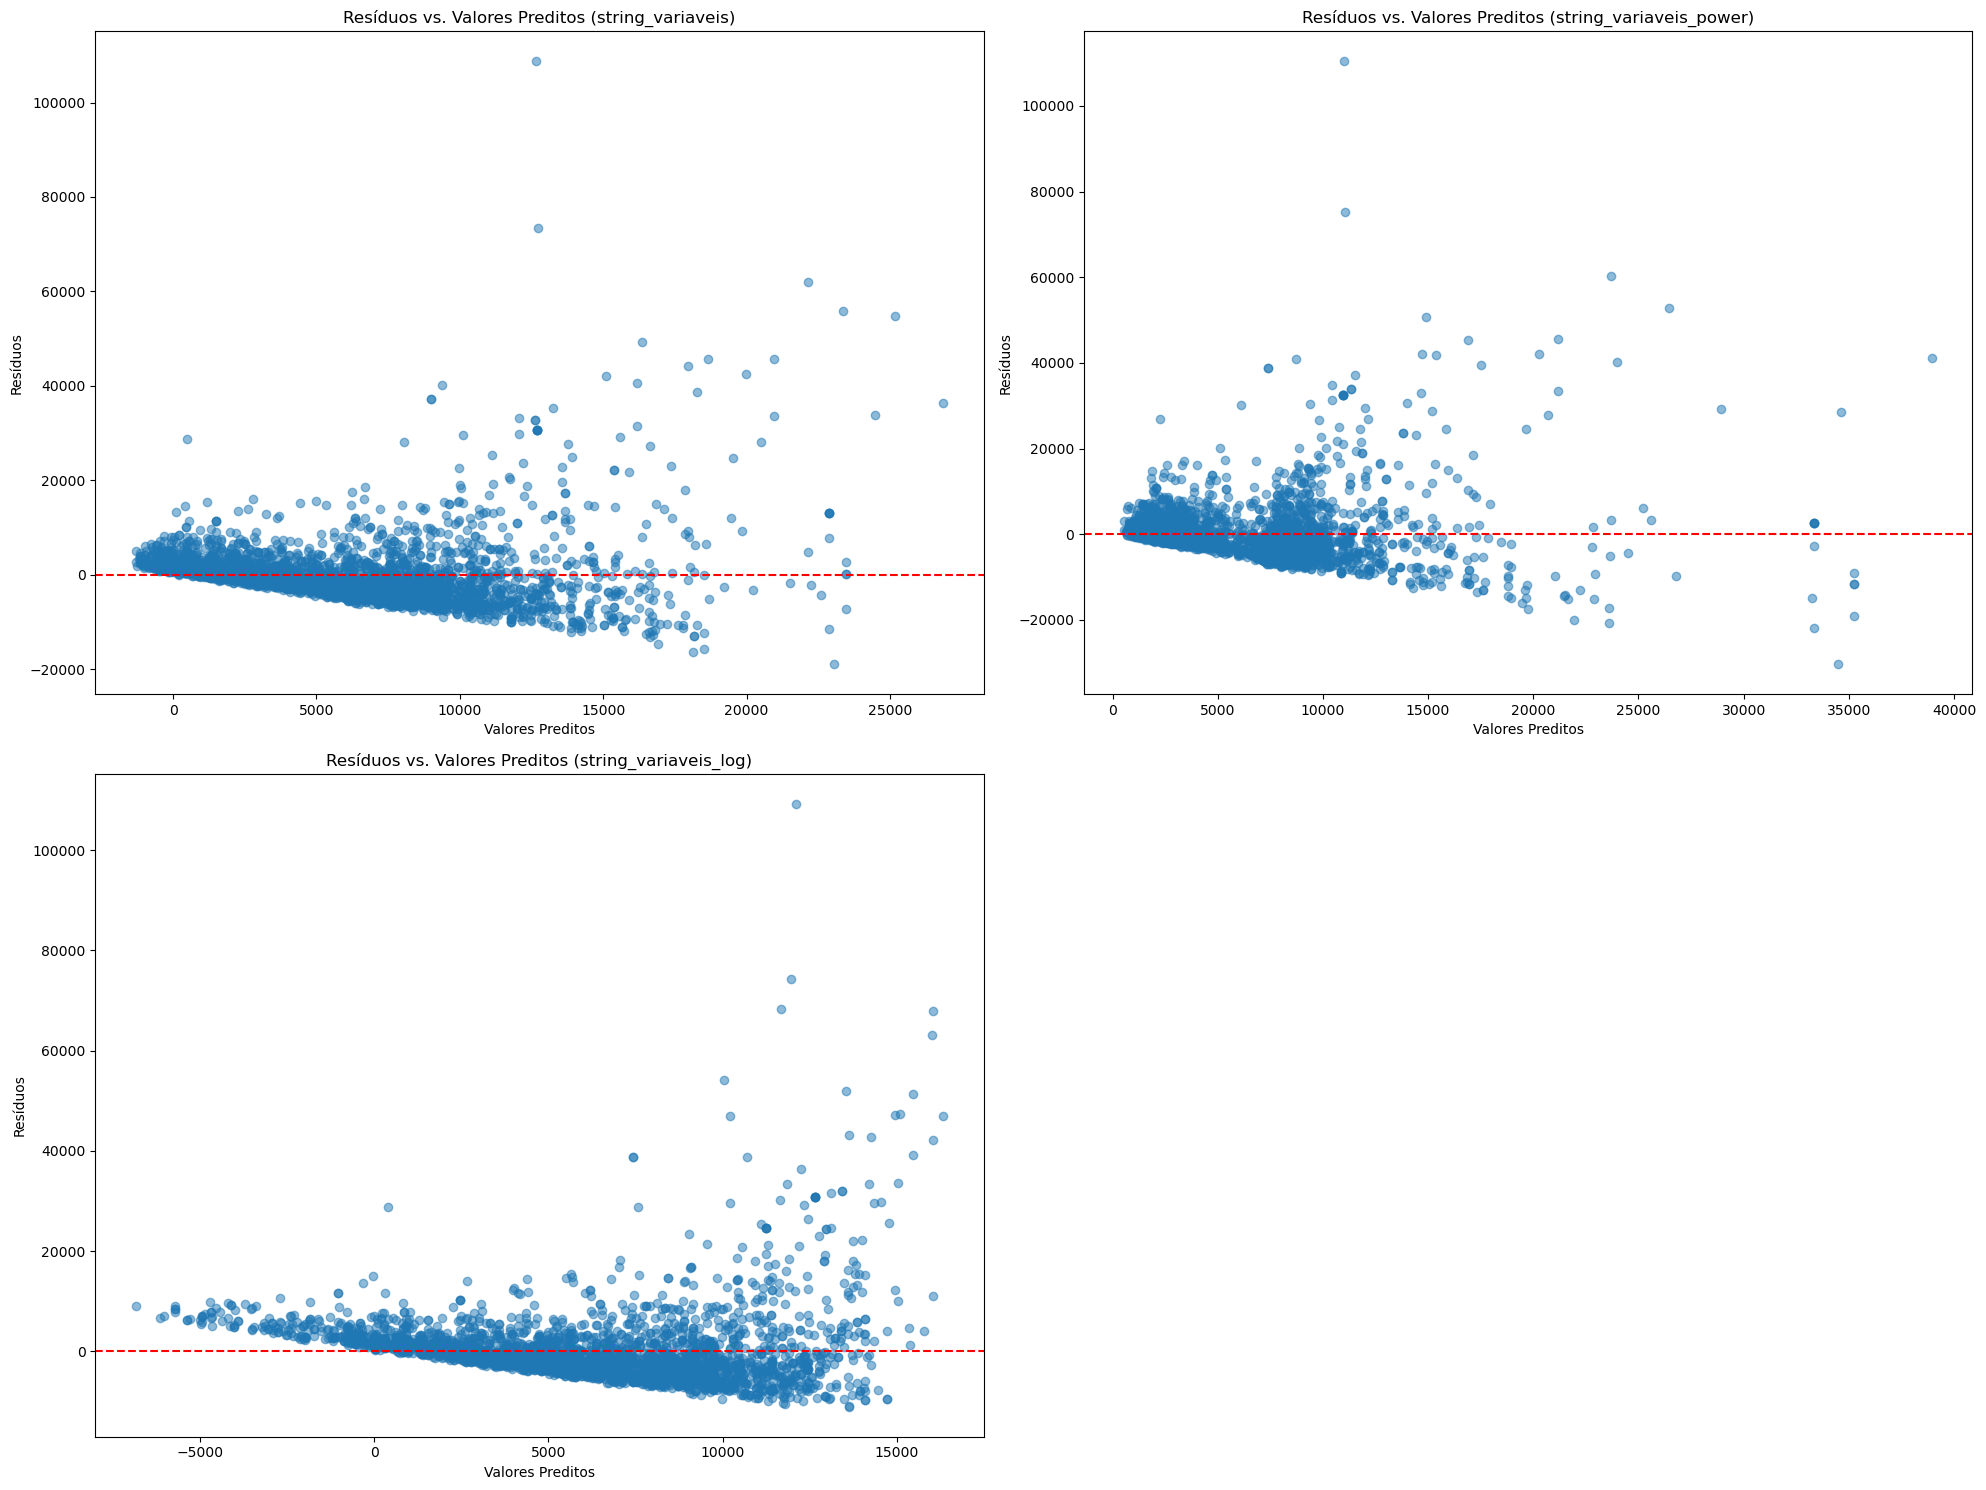

In [138]:
fig, axes = plt.subplots(2,2, figsize=(20,15))
axes = axes.flatten()

for i, nome in enumerate(valores_preditos): 
    preditos = valores_preditos[nome]
    residuos = registro_de_residuos[nome]
    ax = axes[i] 
    ax.scatter(preditos, residuos, alpha=0.5)
    ax.axhline(0, color='red', linestyle='dashed')
    ax.set_xlabel("Valores Preditos")
    ax.set_ylabel("Resíduos")
    ax.set_title(f"Resíduos vs. Valores Preditos ({nome})")
    

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [139]:
clf = DecisionTreeRegressor()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [140]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

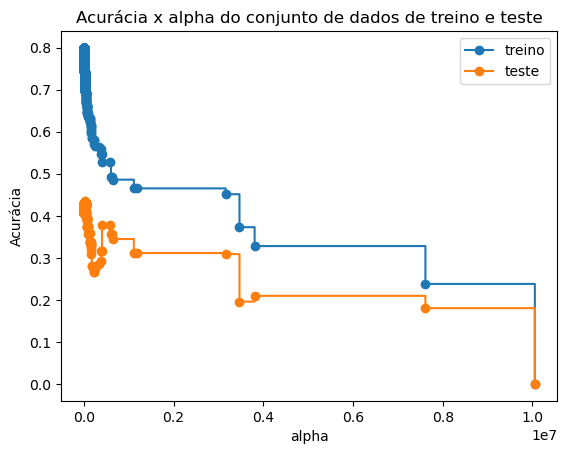

In [141]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores  = [clf.score(X_test, y_test)   for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [142]:
ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
melhor_arvore

DecisionTreeRegressor(ccp_alpha=33260.49826610106, random_state=2360873)

In [143]:
clf.fit(X_train, y_train)
r2 = clf.score(X_test, y_test)

y_pred = clf.predict(X_test)
n = X_test.shape[0] # Número de linhas 
p = X_test.shape[1] # Número de colunas

r2_adj = 1- ((1-r2) * (n-1) / (n - p - 1))

mse = mean_squared_error(y_test, y_pred)
aic = n * np.log(mse) + 2 * p

pd.DataFrame({'R2-Quadrado': [r2], 'R2-Quadrado Ajustado': [r2_adj], 'AIC': [aic]})

,R2-Quadrado,R2-Quadrado Ajustado,AIC
0,-0.00016,-0.009586,55831.88607


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


Após análise dos 4 modelos construidos, 3 deles sendo variações da linha de regressão, foi concluido que o modelo de maior eficácia e maior retorno financeiro para empresa por suas leituras e estimativas mais precisas, seria a árvore de regressão que apresentou um R-Quadrado de 0.44

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.